## Problem statement

- This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
- The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
- Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
- The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.


### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\kiran\Desktop\datatrained\Internship\Final Evaluation projets\First-Phase-Evaluation-Projects--1-\avocado\avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


#### Columns

In [3]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

- Unnamed: 0 - index column can be removed
- Date — The date of the observation
- Average Price — the average price of a single avocado
- type — conventional or organic
- year — the year
- Region — the city or region of the observation
- Total Volume — Total number of avocados sold
- 4046 — Total number of avocados with PLU 4046 sold
- 4225 — Total number of avocados with PLU 4225 sold
- 4770 — Total number of avocados with PLU 4770 sold
- Total Bags — Total number of Bags sold
- Small Bags — Total number of Small Bags sold
- Large Bags — Total number of Large Bags sold
- XLarge Bags — Total number of XLarge Bags sold

#### Target
1. Average Price(Regression)

2. Region (classification)

In [4]:
df.drop(columns='Unnamed: 0',inplace=True)

#### Analising basic metrics

In [5]:
df.shape

(18249, 13)

In [6]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

- There are no Null Values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


#### Findings
- Date,Type and Region are object type data
- Remaining all are Numerical datas

In [8]:
num_col = []
obj_col = []
for i in df.columns:
    if df[i].dtype == object:
        obj_col.append(i)
    else:
        num_col.append(i)


In [9]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


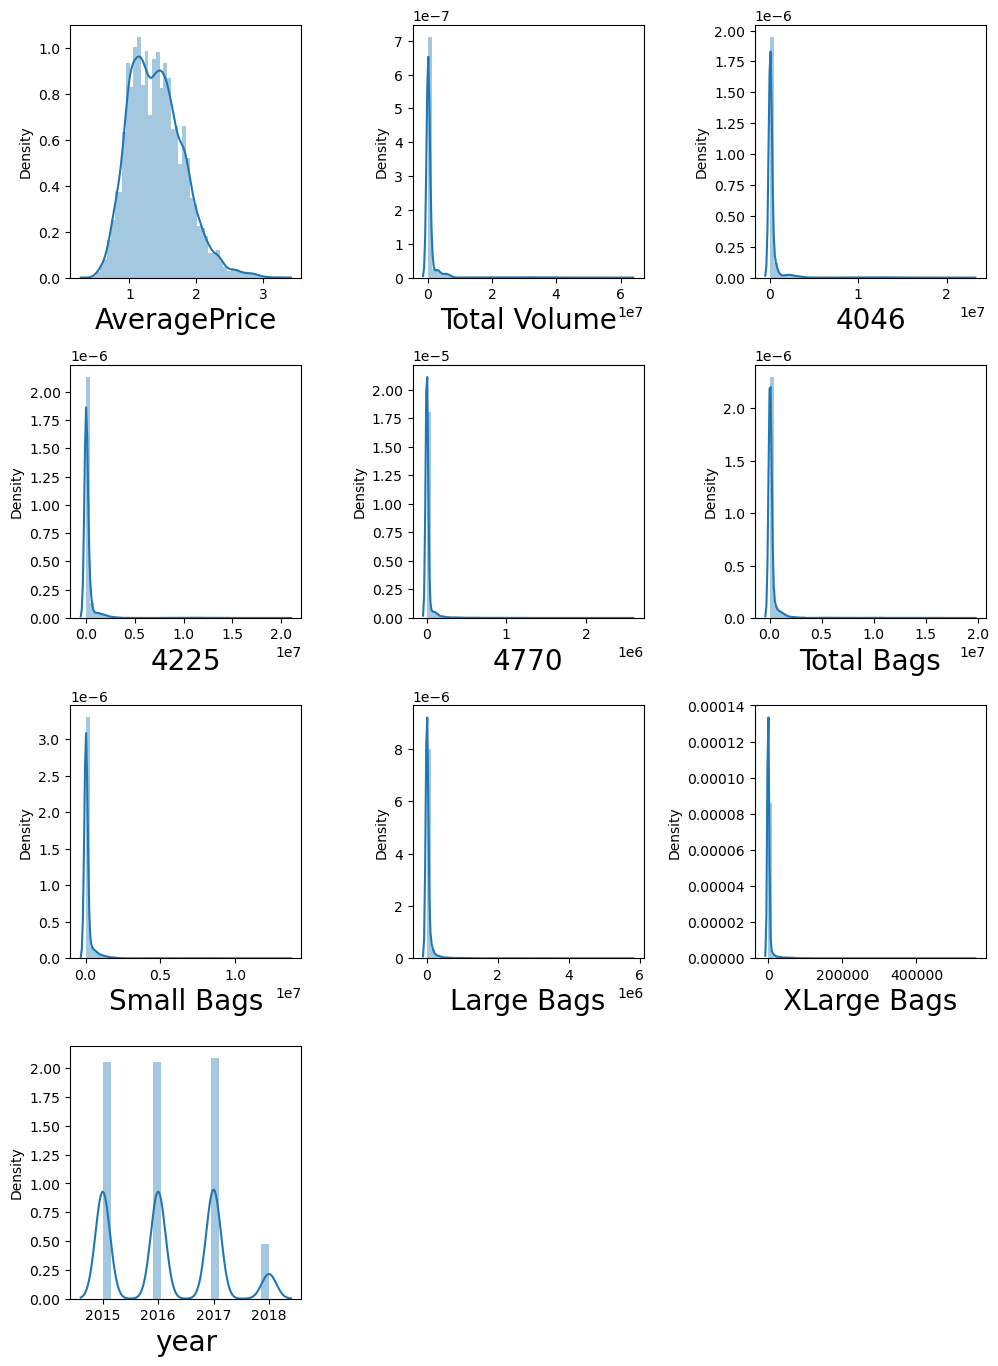

In [10]:
plt.figure(figsize=(10,20))
pn = 1
for column in num_col:
    
    sns.distplot(df[column],ax=plt.subplot(6,3,pn))
    plt.xlabel(column,fontsize = 20)
    pn +=1
    
plt.tight_layout()      

#### Observations from above results
- Distribution
    - Normally distributed (Since Mean ~= Median)
        - Average price
        - Year
    - Right skewed (mean > median)
        - Total Volume
        - 4046
        - 4225
        - 4770
        - Total bags
        - Small bags
        - Large bags
        - XLarge bags
      
      
- Outliers can be observed in all columns containing Right Skeweness since there is large difference between Minimun and 25% data and there is large difference between Maximum and 75% data


In [11]:
print(df.type.value_counts(),end='\n'+'*'*15 + "\n\n")
print(df.region.value_counts(),end='\n'+'*'*15 + "\n\n")
print(df.year.value_counts(),end='\n'+'*'*15 + "\n\n")

conventional    9126
organic         9123
Name: type, dtype: int64
***************

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       33

In [12]:
# converting Date to datetyme format
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)

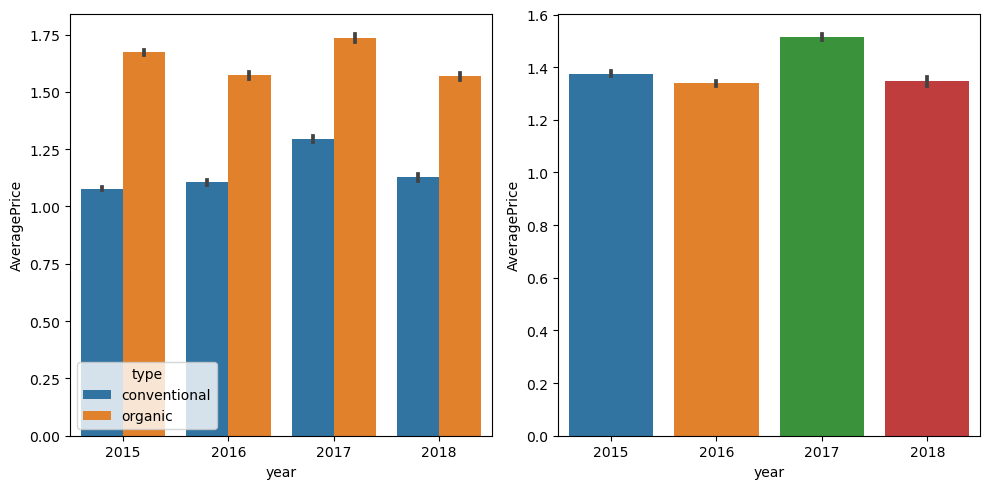

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x='year',y = 'AveragePrice',data = df,hue='type',ax=plt.subplot(1,2,1))
sns.barplot(x='year',y = 'AveragePrice',data = df,ax=plt.subplot(1,2,2))
plt.tight_layout()

- From above data we can observe that Average price of avacados was maximum in year 2017 and minimum in year 2016
- Average price of Organin Avacados is higher as compared to conventional once


<AxesSubplot: xlabel='Month', ylabel='AveragePrice'>

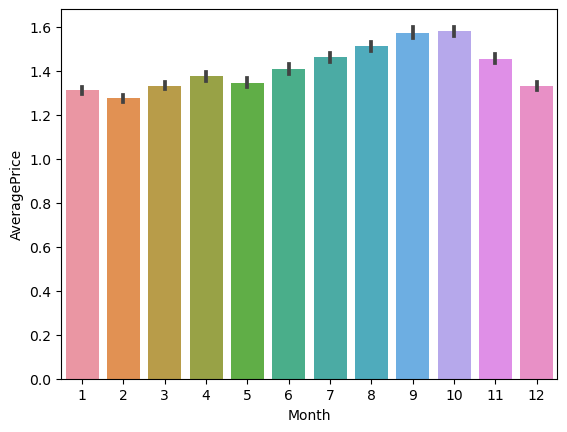

In [14]:
sns.barplot(x='Month',y = 'AveragePrice',data = df)

From above graph we can observe that Average prices if Avacado is higher in months of September and October, And It is least in month of February 

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

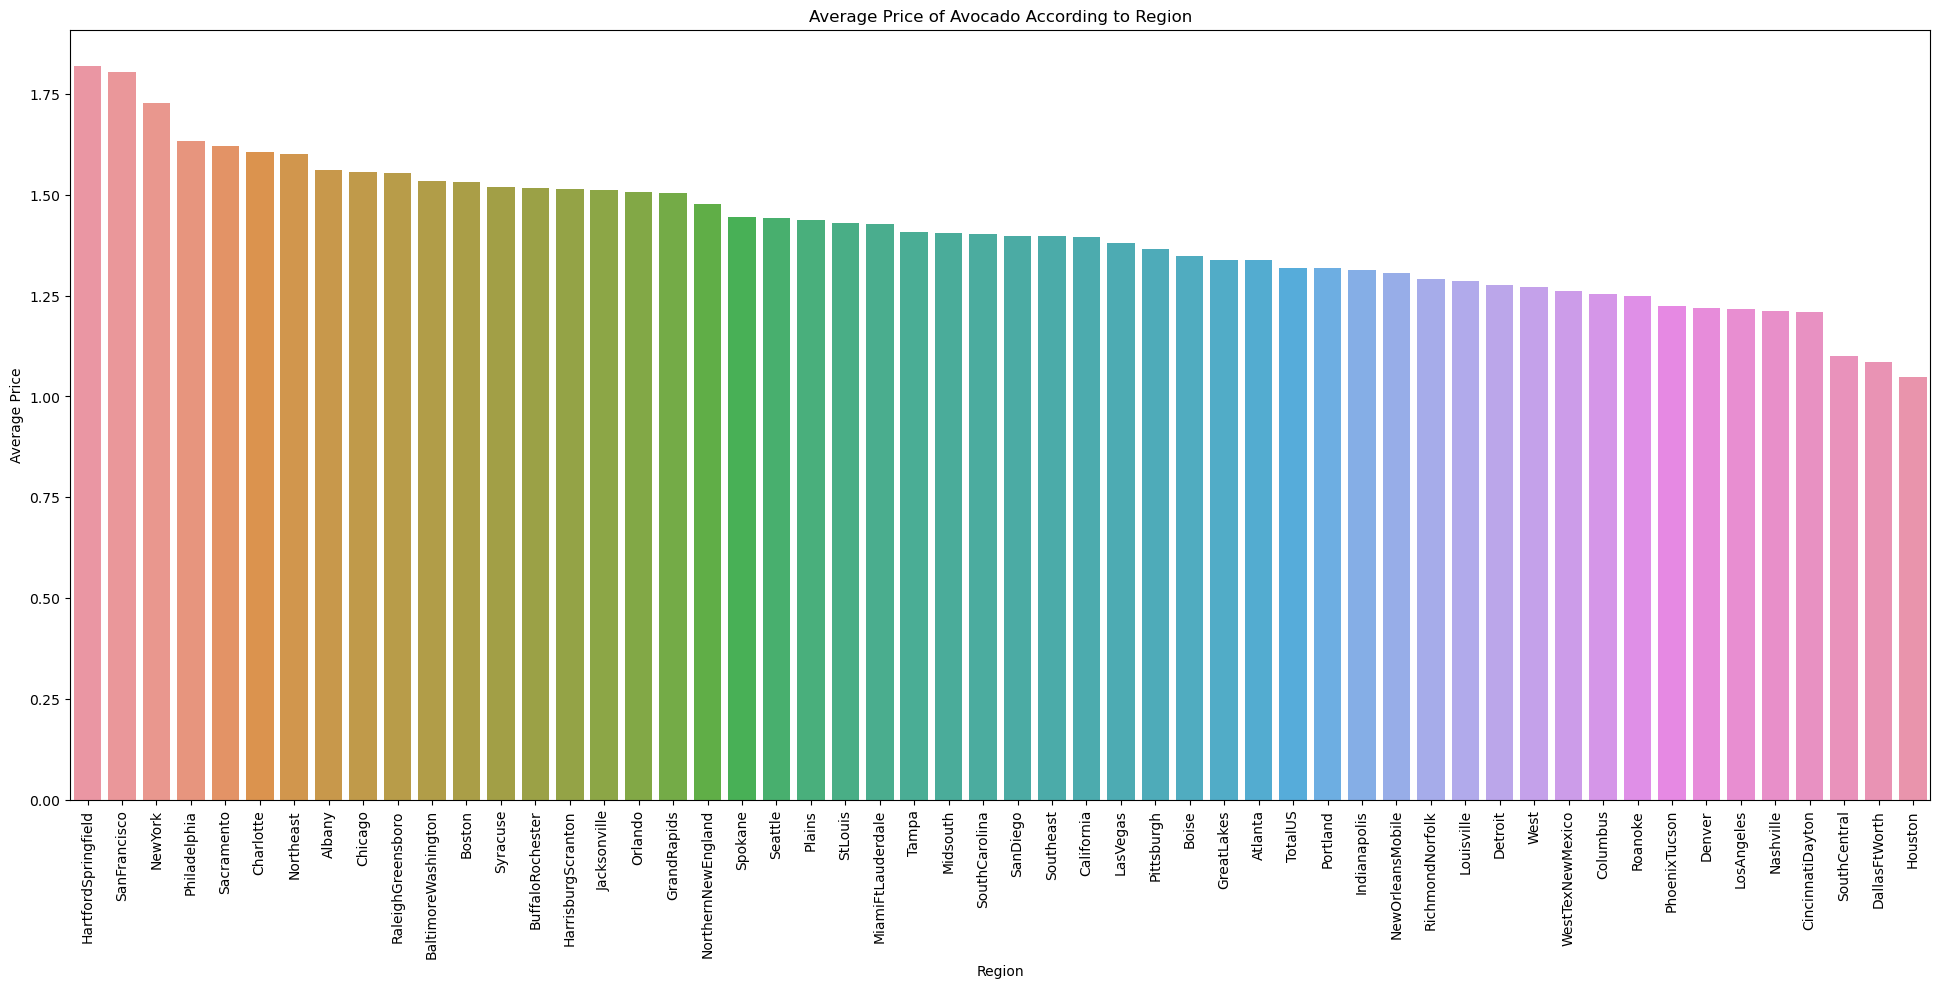

In [15]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

We can Observe that Average Price of Avacado is in HartfordSpringfield and it is least in Houston

<AxesSubplot: xlabel='type', ylabel='Total Volume'>

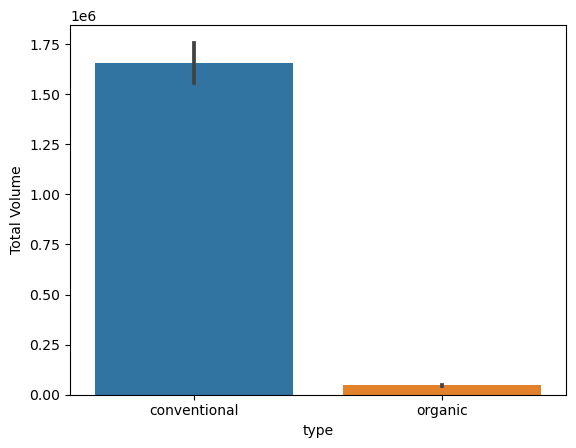

In [16]:
sns.barplot(x='type',y = 'Total Volume',data = df)

We can observe that eventhough Price of Organic avacados is high The volume of Organic avacados sold is very less as compared to conventional once

In [17]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month'],
      dtype='object')

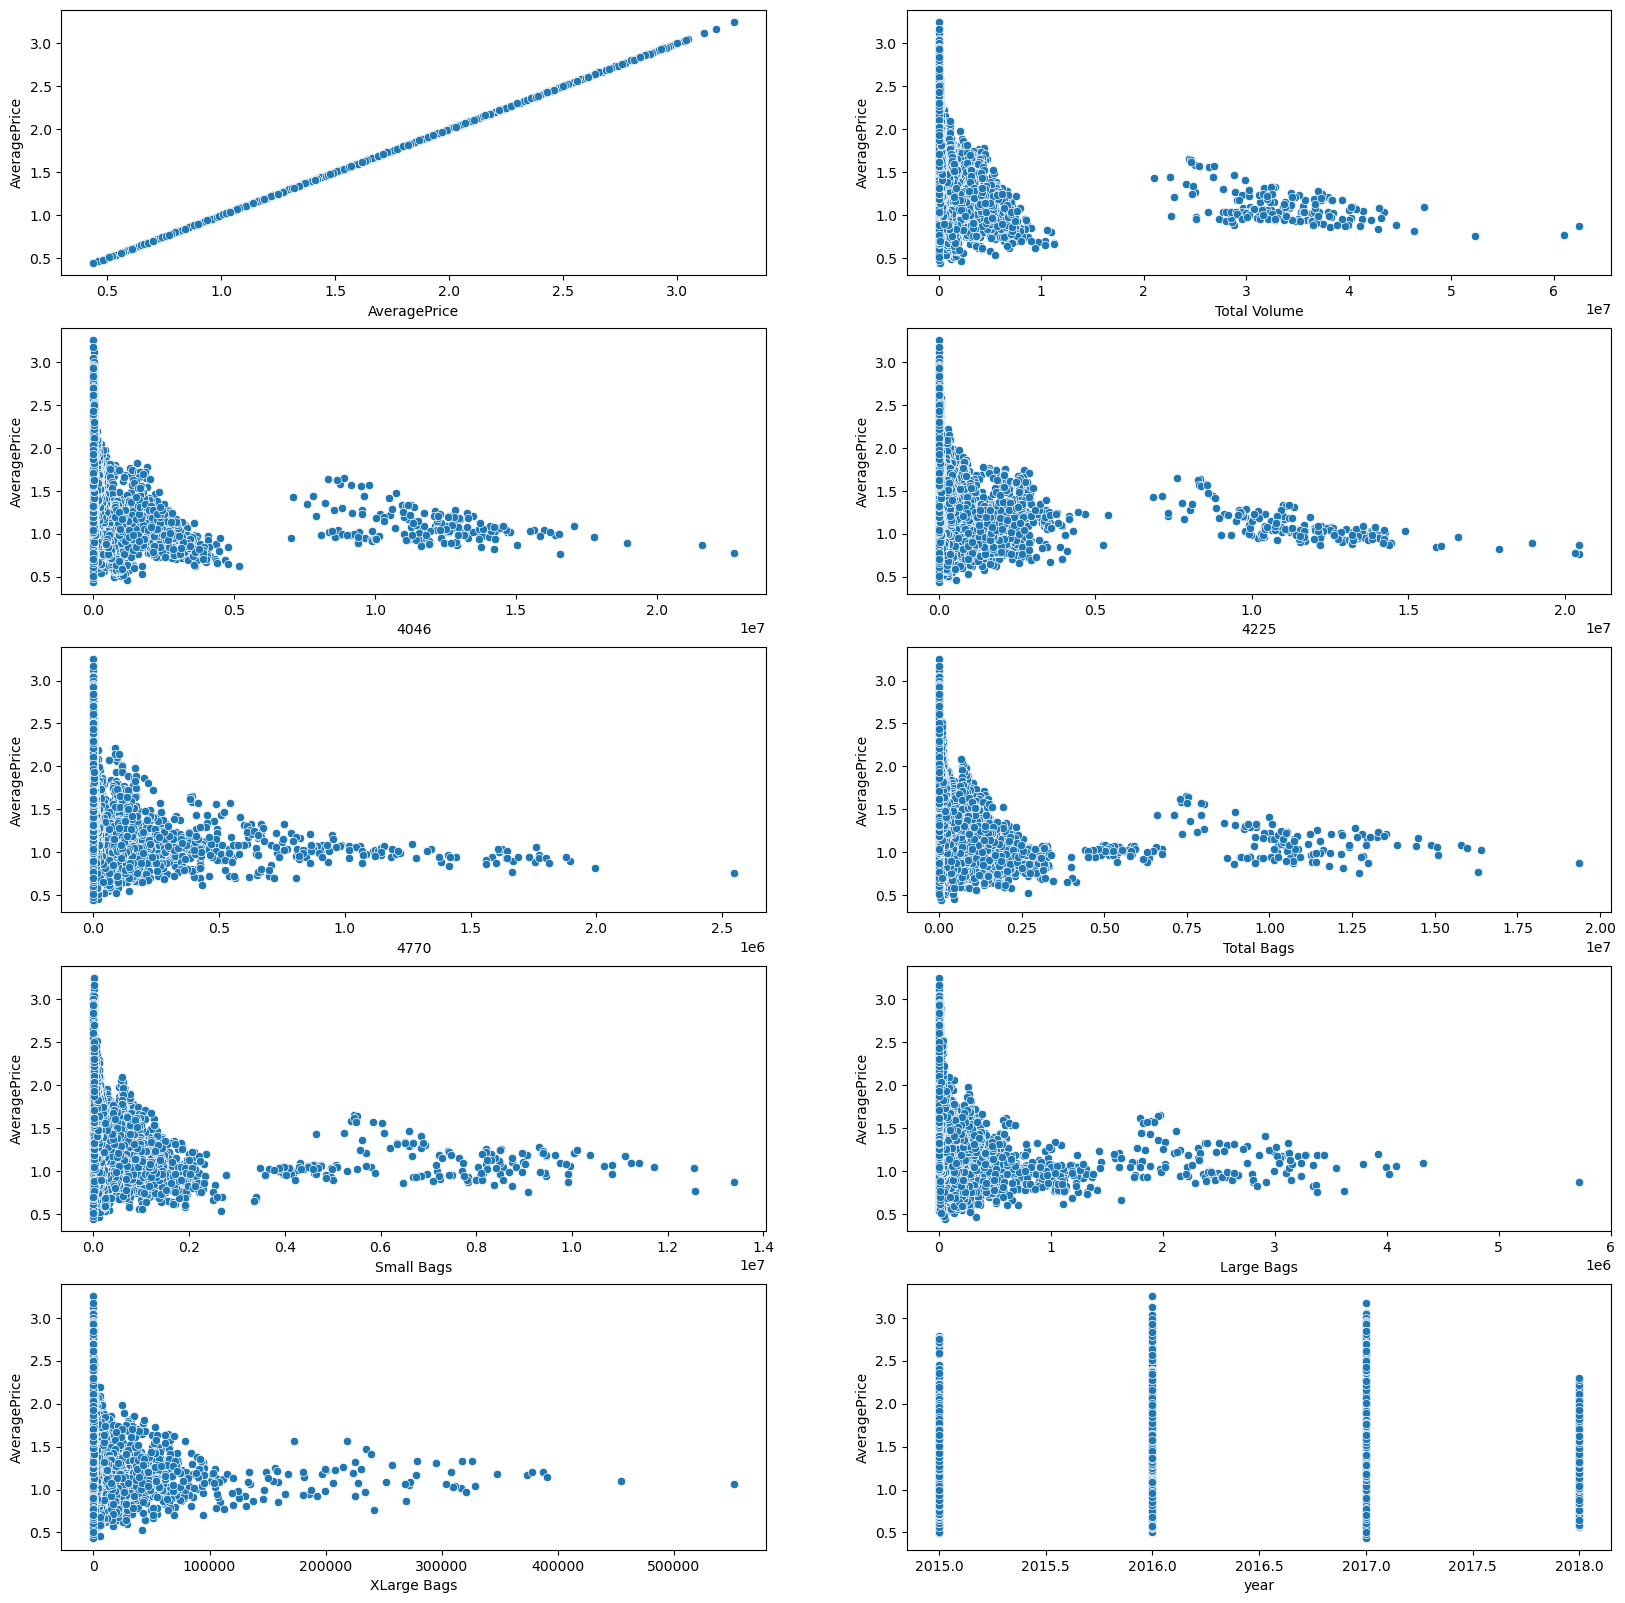

In [18]:
plt.figure(figsize=(20,20))
pn = 1
for i in num_col:
    if pn <= 10:
        sns.scatterplot(x=i,y='AveragePrice',data=df,ax=plt.subplot(5,2,pn))
        pn+=1

We can observe that Every numerical column except Year and Average Price are having Slightly Negative relation with average price

### Encoading Categorical Data

using Label Encoader

In [19]:
from sklearn.preprocessing import LabelEncoder
Lab_r = LabelEncoder()
df['region']=Lab_r.fit_transform(df['region'])

Lab_t = LabelEncoder()
df['type'] = Lab_t.fit_transform(df['type'])

In [20]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month'],
      dtype='object')

### Removing un wanted column
- we can remove date column and keep month column insted

In [21]:
df.drop(columns='Date',inplace=True)

### Outliers

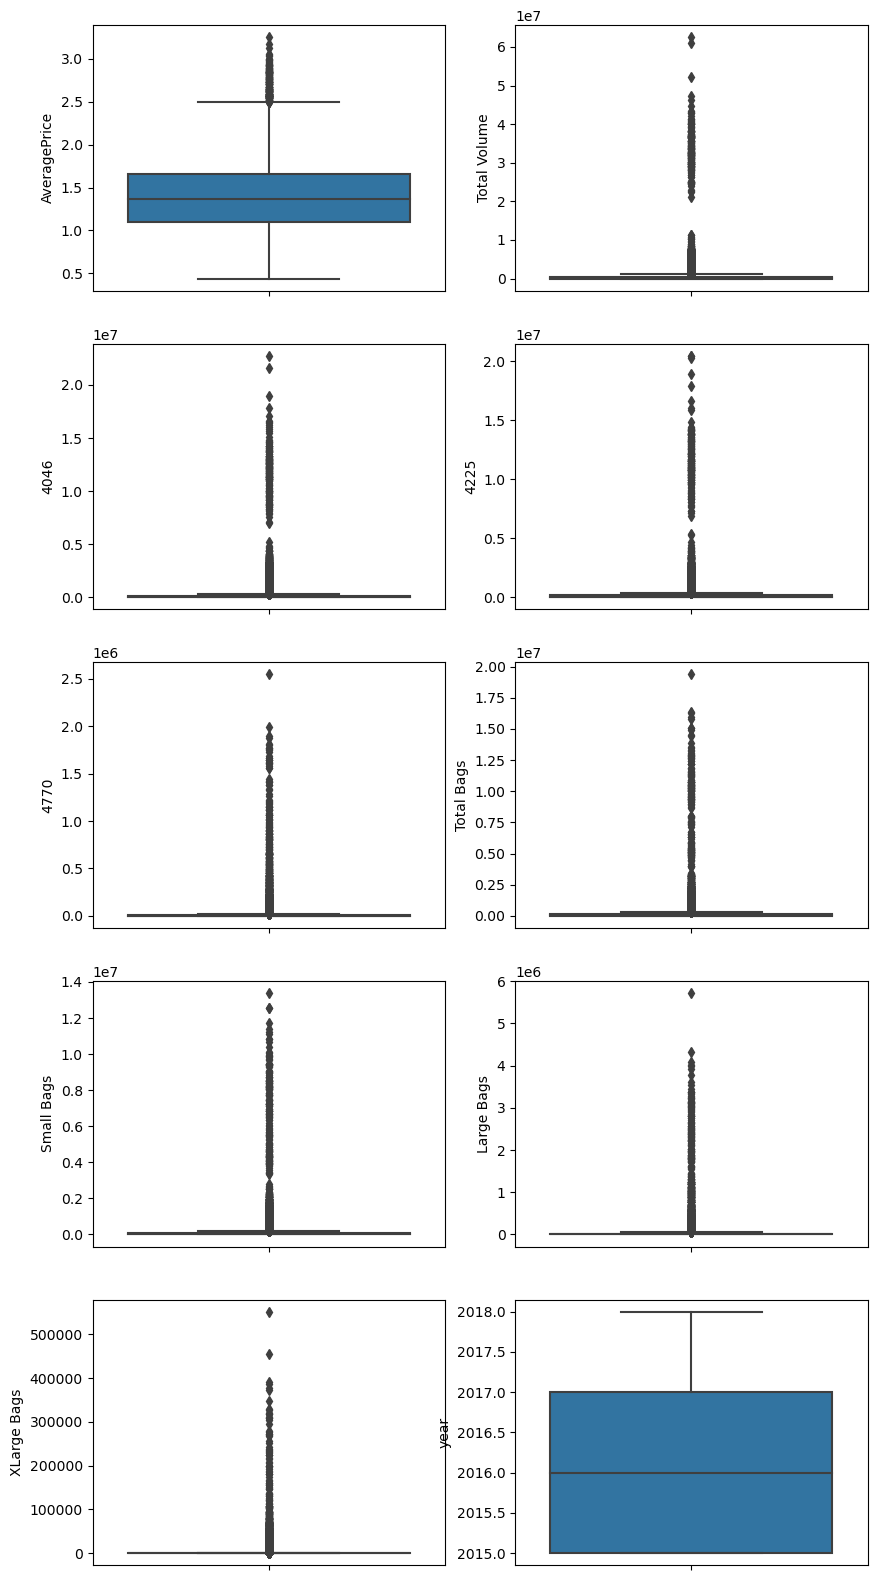

In [22]:
plt.figure(figsize=(10,20))
pn = 1
for i in num_col:
    sns.boxplot(y=df[i],ax=plt.subplot(5,2,pn))
    pn+=1

- There are Many outliers which are needed to be removed
- we shell use z-score for Removing outliers

In [23]:
prev = df.shape

In [24]:
# finding outliers using z score
from scipy.stats import zscore
z = np.abs(zscore(df[num_col]))
z[z>3].count()

AveragePrice    131
Total Volume    171
4046            181
4225            180
4770            259
Total Bags      187
Small Bags      179
Large Bags      251
XLarge Bags     234
year              0
dtype: int64

In [25]:
df[num_col] = df[num_col][z<3]
df = df.dropna()
df.reset_index(drop=True,inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17646,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2
17647,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1
17648,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1
17649,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1


In [26]:
df.shape

(17651, 13)

In [27]:
print('Data Loss % = ',np.round((prev[0]-df.shape[0])*100/prev[0],2),"%")

Data Loss % =  3.28 %


Since our data loss is only 3.3% we can continue

### Skeweness

In [28]:
df[num_col].skew().abs()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
year            0.229976
dtype: float64

In [29]:
# seperating skew columns
skew=[num_col[i] for i in np.where(df[num_col].skew().abs() > 0.5)[0].tolist()]

In [30]:
skew

['Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']

In [31]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
df[skew] = pt.fit_transform(df[skew])
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,11.859698,8.459046,18.125626,3.800782,12.604637,14.988007,5.609263,-0.0,0,2015,0,12
1,1.35,11.679417,7.836672,17.619790,3.979574,12.771325,15.216601,5.675475,-0.0,0,2015,0,12
2,0.93,12.561302,8.072625,19.965175,4.731656,12.482466,14.816826,5.759783,-0.0,0,2015,0,12
3,1.08,12.096944,8.588079,18.850378,4.183730,11.861497,13.952201,6.154871,-0.0,0,2015,0,12
4,1.28,11.596546,8.318295,17.574174,4.224040,11.974755,14.081739,6.767433,-0.0,0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17646,1.63,10.353750,9.474294,10.237344,-0.000000,13.438887,16.075093,8.061951,-0.0,1,2018,53,2
17647,1.71,10.121168,8.663815,11.814608,-0.000000,12.723133,15.085843,7.579136,-0.0,1,2018,53,1
17648,1.87,10.111306,8.664087,11.145900,6.324553,12.749156,15.201193,4.481260,-0.0,1,2018,53,1
17649,1.93,10.294842,9.032839,11.531973,6.323378,13.042032,15.602341,4.711895,-0.0,1,2018,53,1


#### Corelation Analysis

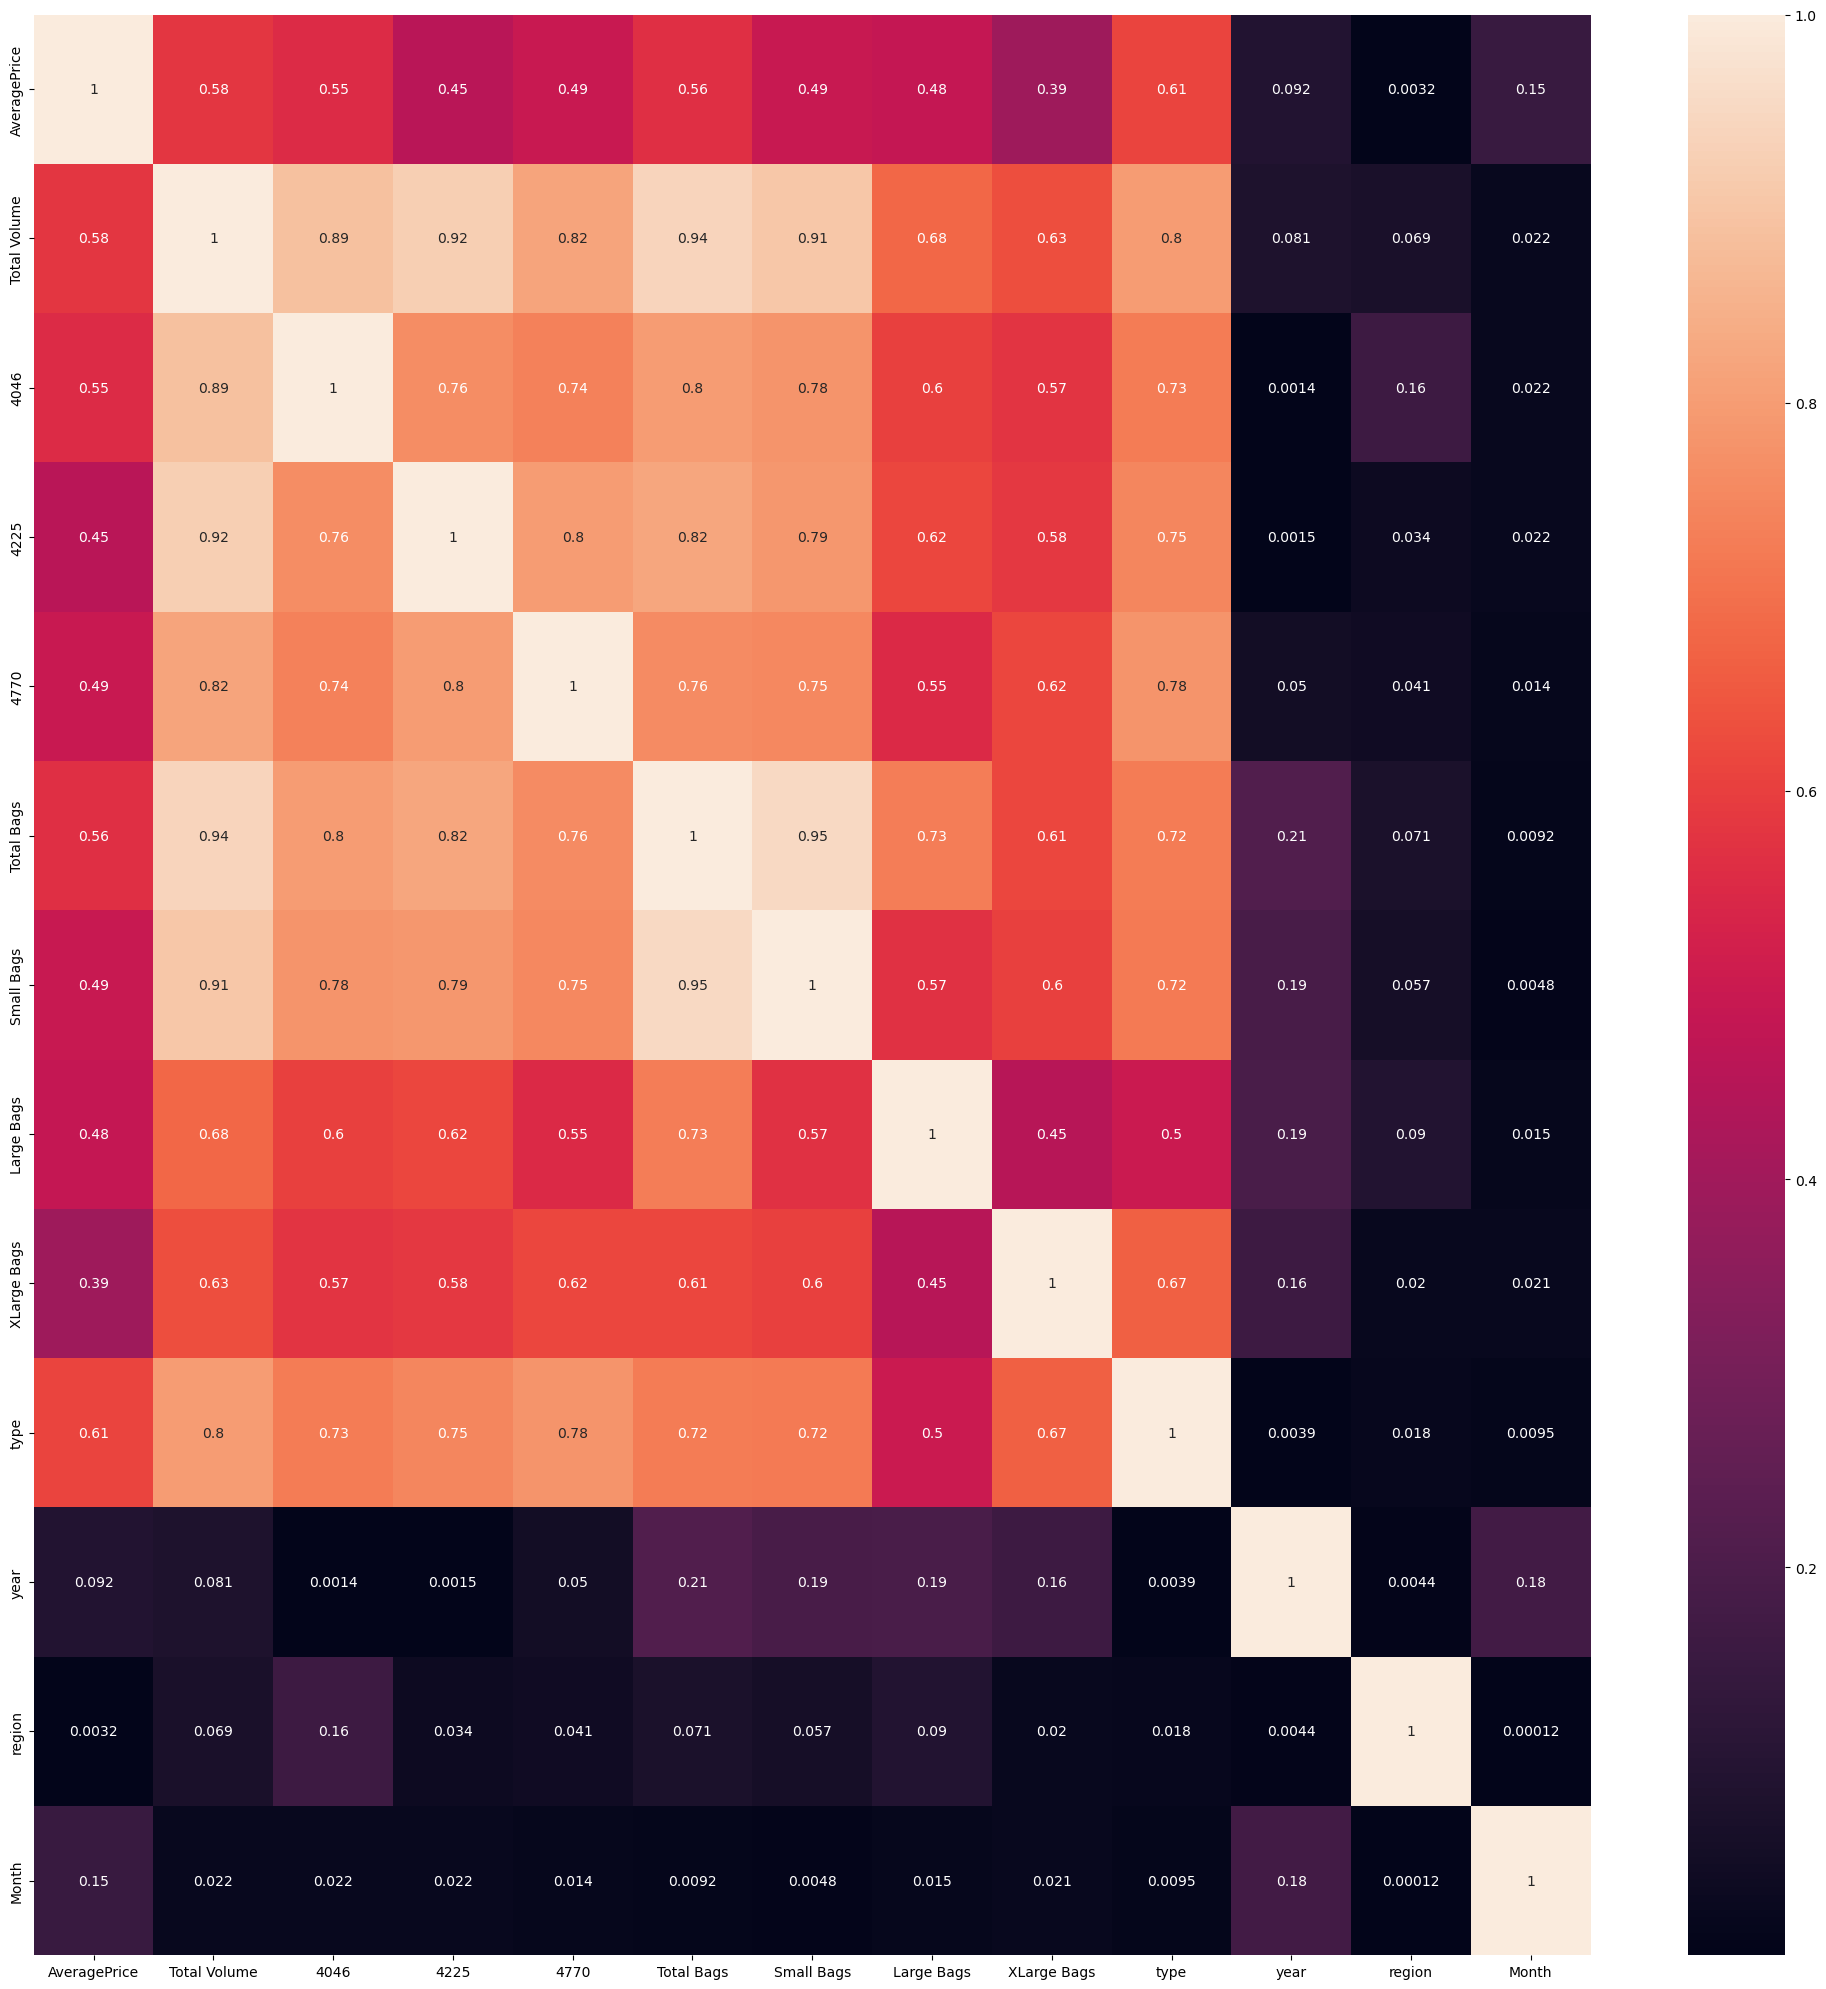

In [32]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr().abs(),annot=True,annot_kws={'size':10})
plt.tight_layout()

- There is High Multicolinearity in Total volume column and Total Bag Column
- we can remove these columns since Total volume is sum of All PLU columns Total Bag column is sum of Remaining Bags Columns

In [33]:
df=df.drop(columns=['Total Volume','Total Bags'])

## Regression

In [34]:
x = df.drop(columns='AveragePrice')
y=df['AveragePrice']

In [35]:
x

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,8.459046,18.125626,3.800782,14.988007,5.609263,-0.0,0,2015,0,12
1,7.836672,17.619790,3.979574,15.216601,5.675475,-0.0,0,2015,0,12
2,8.072625,19.965175,4.731656,14.816826,5.759783,-0.0,0,2015,0,12
3,8.588079,18.850378,4.183730,13.952201,6.154871,-0.0,0,2015,0,12
4,8.318295,17.574174,4.224040,14.081739,6.767433,-0.0,0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...
17646,9.474294,10.237344,-0.000000,16.075093,8.061951,-0.0,1,2018,53,2
17647,8.663815,11.814608,-0.000000,15.085843,7.579136,-0.0,1,2018,53,1
17648,8.664087,11.145900,6.324553,15.201193,4.481260,-0.0,1,2018,53,1
17649,9.032839,11.531973,6.323378,15.602341,4.711895,-0.0,1,2018,53,1


In [36]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
17646    1.63
17647    1.71
17648    1.87
17649    1.93
17650    1.62
Name: AveragePrice, Length: 17651, dtype: float64

### Standerd Scaler

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,-0.657421,0.351430,-0.222566,-0.347421,-0.781153,-0.677919,-1.019047,-1.210013,-1.695495,1.644612
1,-0.777179,0.269513,-0.175223,-0.311322,-0.771198,-0.677919,-1.019047,-1.210013,-1.695495,1.644612
2,-0.731776,0.649333,0.023923,-0.374453,-0.758523,-0.677919,-1.019047,-1.210013,-1.695495,1.644612
3,-0.632592,0.468799,-0.121164,-0.510991,-0.699123,-0.677919,-1.019047,-1.210013,-1.695495,1.644612
4,-0.684504,0.262126,-0.110491,-0.490534,-0.607027,-0.677919,-1.019047,-1.210013,-1.695495,1.362113
...,...,...,...,...,...,...,...,...,...,...
17646,-0.462066,-0.926028,-1.228986,-0.175753,-0.412401,-0.677919,0.981309,1.980756,1.747054,-1.180379
17647,-0.618019,-0.670600,-1.228986,-0.331971,-0.484991,-0.677919,0.981309,1.980756,1.747054,-1.462878
17648,-0.617966,-0.778893,0.445710,-0.313756,-0.950743,-0.677919,0.981309,1.980756,1.747054,-1.462878
17649,-0.547011,-0.716371,0.445399,-0.250408,-0.916068,-0.677919,0.981309,1.980756,1.747054,-1.462878


### Train test Split

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
lr = LinearRegression()

In [39]:
# finding best random state
tts_df = pd.DataFrame(data=None,columns=['Random state','Train accuracy','Test accuracy'])
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    train_score = r2_score(y_train,pred_train)
    test_score = r2_score(y_test,pred_test)
    if round(train_score*100,0) == round(test_score*100,0):
        tts_df =tts_df.append({'Random state':i,'Train accuracy':train_score*100,'Test accuracy':test_score*100},ignore_index=True)

    
tts_df.sort_values('Test accuracy',ascending=False)  


,Random state,Train accuracy,Test accuracy
374,946.0,50.862586,51.494149
280,693.0,50.863567,51.492664
188,451.0,50.869645,51.492176
268,652.0,50.876890,51.482161
166,405.0,50.873610,51.477698
...,...,...,...
25,67.0,51.116691,50.516414
95,236.0,51.112836,50.516208
139,336.0,51.115924,50.513841
339,852.0,51.115705,50.510001


- Therefore best random state is 946

In [40]:
# Training model at best Random state
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=946)

## Training models

#### Linear Regression

In [41]:
lr.fit(x_train,y_train)
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)
lr_pred_test = lr.predict(x_test)
lr_r2_test_score = r2_score(y_test,pred_test)
print(lr_r2_test_score*100,"%")

51.49414891352462 %


In [42]:
# Find best cv using k-fold
from sklearn.model_selection import KFold
for i in range(3,8):
    # Set the number of folds for cross-validation
    num_folds = i
    model=LinearRegression()

    # Create a KFold object
    kf = KFold(n_splits=num_folds, shuffle=True,random_state=150)

    # Initialize an empty list to store the MSE scores
    r2_scores = []

    # Perform K-fold cross-validation
    for train_index, test_index in kf.split(x_scaled):
        # Get the training and test sets for this fold
        X_train_1, X_test_1 = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
        y_train_1, y_test_1 = y.iloc[train_index], y.iloc[test_index]

        # Fit the model on the training data
        model.fit(X_train_1, y_train_1)

        # Make predictions on the test data
        y_pred = model.predict(X_test_1)

        # Calculate the MSE for this fold and append to the list
        r2_scores.append(r2_score(y_test_1, y_pred))

    # Calculate the average MSE score
    avg_mse_score = np.mean(r2_scores)

    # Print the average MSE score
    print('CV = ',i,"Average r2 score:", round(avg_mse_score*100,5),'Difference = ',round(np.abs(avg_mse_score-lr_r2_test_score)*100,4))

CV =  3 Average r2 score: 50.9346 Difference =  0.5595
CV =  4 Average r2 score: 50.90816 Difference =  0.586
CV =  5 Average r2 score: 50.92094 Difference =  0.5732
CV =  6 Average r2 score: 50.91771 Difference =  0.5764
CV =  7 Average r2 score: 50.91379 Difference =  0.5804


- cv = 3 is giving comparitively better result

In [43]:
# creating df for storing cv score and acc score
ms_df = pd.DataFrame(data=None,columns=['Model','CV score','Test accuracy','Difference'])

In [44]:
#best cv score at cv = 3
cv = 3
# Set the number of folds for cross-validation
num_folds = cv
model=LinearRegression()

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True,random_state=150)

# Initialize an empty list to store the MSE scores
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x_scaled):
    # Get the training and test sets for this fold
    X_train_1, X_test_1 = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train_1, y_test_1 = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train_1, y_train_1)

    # Make predictions on the test data
    y_pred = model.predict(X_test_1)

    # Calculate the MSE for this fold and append to the list
    r2_scores.append(r2_score(y_test_1, y_pred))

# Calculate the average MSE score
avg_r2_score = np.mean(r2_scores)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(lr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(lr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Linear regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(lr_r2_test_score*100,4),'Difference':round(np.abs(lr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  50.9346 % 
r2 score =  51.4941 % 
Difference =  0.5595 %



##### DecisionTreeRegressor

In [45]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pred_test = dtr.predict(x_test)
dtr_r2_test_score = r2_score(y_test,dtr_pred_test)
print(dtr_r2_test_score*100,"%")

75.61222560577932 %


In [46]:
# Set the number of folds for cross-validation
num_folds = cv
model=DecisionTreeRegressor()

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True,random_state=150)

# Initialize an empty list to store the MSE scores
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x_scaled):
    # Get the training and test sets for this fold
    X_train_1, X_test_1 = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train_1, y_test_1 = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train_1, y_train_1)

    # Make predictions on the test data
    y_pred = model.predict(X_test_1)

    # Calculate the MSE for this fold and append to the list
    r2_scores.append(r2_score(y_test_1, y_pred))

# Calculate the average MSE score
avg_r2_score = np.mean(r2_scores)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(dtr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(dtr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Decision Tree regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(dtr_r2_test_score*100,4),'Difference':round(np.abs(dtr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  74.142501 % 
r2 score =  75.6122 % 
Difference =  1.4697 %



##### RandomForestRegressor

In [47]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred_test = rfr.predict(x_test)
rfr_r2_test_score = r2_score(y_test,rfr_pred_test)

print(rfr_r2_test_score*100,"%")

88.94796976907018 %


In [48]:
# Set the number of folds for cross-validation
num_folds = cv
model=RandomForestRegressor()

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True,random_state=150)

# Initialize an empty list to store the MSE scores
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x_scaled):
    # Get the training and test sets for this fold
    X_train_1, X_test_1 = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train_1, y_test_1 = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train_1, y_train_1)

    # Make predictions on the test data
    y_pred = model.predict(X_test_1)

    # Calculate the MSE for this fold and append to the list
    r2_scores.append(r2_score(y_test_1, y_pred))

# Calculate the average MSE score
avg_r2_score = np.mean(r2_scores)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(rfr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(rfr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Random forest regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(rfr_r2_test_score*100,4),'Difference':round(np.abs(rfr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  87.87637 % 
r2 score =  88.948 % 
Difference =  1.0716 %



#### AdaBoostRegressor

In [49]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor()
abr.fit(x_train,y_train)
abr_pred_test = abr.predict(x_test)
abr_r2_test_score = r2_score(y_test,abr_pred_test)
print(abr_r2_test_score*100,"%")

55.82748336779721 %


In [50]:
# Set the number of folds for cross-validation
num_folds = cv
model=AdaBoostRegressor()

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True,random_state=150)

# Initialize an empty list to store the MSE scores
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x_scaled):
    # Get the training and test sets for this fold
    X_train_1, X_test_1 = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train_1, y_test_1 = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train_1, y_train_1)

    # Make predictions on the test data
    y_pred = model.predict(X_test_1)

    # Calculate the MSE for this fold and append to the list
    r2_scores.append(r2_score(y_test_1, y_pred))

# Calculate the average MSE score
avg_r2_score = np.mean(r2_scores)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(abr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(abr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Ada Boost regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(abr_r2_test_score*100,4),'Difference':round(np.abs(abr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  54.55973 % 
r2 score =  55.8275 % 
Difference =  1.2678 %



#### GradientBoostingRegressor

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr_pred_test = gbr.predict(x_test)
gbr_r2_test_score = r2_score(y_test,gbr_pred_test)
print(gbr_r2_test_score*100,"%")

73.3805778589928 %


In [52]:
# Set the number of folds for cross-validation
num_folds = cv
model=GradientBoostingRegressor()

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True,random_state=150)

# Initialize an empty list to store the MSE scores
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x_scaled):
    # Get the training and test sets for this fold
    X_train_1, X_test_1 = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train_1, y_test_1 = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train_1, y_train_1)

    # Make predictions on the test data
    y_pred = model.predict(X_test_1)

    # Calculate the MSE for this fold and append to the list
    r2_scores.append(r2_score(y_test_1, y_pred))

# Calculate the average MSE score
avg_r2_score = np.mean(r2_scores)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(gbr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(gbr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Gradient Boost regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(gbr_r2_test_score*100,4),'Difference':round(np.abs(gbr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  73.884346 % 
r2 score =  73.3806 % 
Difference =  0.5038 %



#### XGBRegressor

In [53]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(x_train,y_train)
xgbr_pred_test = xgbr.predict(x_test)
xgbr_r2_test_score = r2_score(y_test,xgbr_pred_test)
print(xgbr_r2_test_score*100,"%")

89.57337018820226 %


In [54]:
# Set the number of folds for cross-validation
num_folds = cv
model=XGBRegressor()

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True,random_state=150)

# Initialize an empty list to store the MSE scores
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x_scaled):
    # Get the training and test sets for this fold
    X_train_1, X_test_1 = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train_1, y_test_1 = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train_1, y_train_1)

    # Make predictions on the test data
    y_pred = model.predict(X_test_1)

    # Calculate the MSE for this fold and append to the list
    r2_scores.append(r2_score(y_test_1, y_pred))

# Calculate the average MSE score
avg_r2_score = np.mean(r2_scores)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(xgbr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(xgbr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':' XGBoost regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(xgbr_r2_test_score*100,4),'Difference':round(np.abs(xgbr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  88.922197 % 
r2 score =  89.5734 % 
Difference =  0.6512 %



In [55]:
ms_df.sort_values(by='Test accuracy',ascending=False,ignore_index=True)

,Model,CV score,Test accuracy,Difference
0,XGBoost regression,88.9222,89.5734,0.6512
1,Random forest regression,87.8764,88.9480,1.0716
2,Decision Tree regression,74.1425,75.6122,1.4697
3,Gradient Boost regression,73.8843,73.3806,0.5038
4,Ada Boost regression,54.5597,55.8275,1.2678
5,Linear regression,50.9346,51.4941,0.5595


- XGBoost Regression is giving best test accuracy and cv scores therefore we can use XGBoost Regression for our problem 

- since difference between CV score and Test accuracy is very less there is no over fitting

### Hyperparameter Tuning

In [56]:
from sklearn.model_selection import GridSearchCV
grid_parm = {
    'learning_rate': [0.05, 0.1, 0.2],         # Minimum sum of instance weight needed in a child
    'gamma': [0, 0.1, 0.2],           # Fraction of samples used for fitting the trees
    'reg_alpha': [0, 0.1, 0.5],              # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.5]              # L2 regularization term on weights
}

In [57]:
gcv = GridSearchCV(estimator=XGBRegressor(),param_grid=grid_parm,cv=5)
gcv.fit(x_train,y_train)
gcv.best_params_

{'gamma': 0, 'learning_rate': 0.2, 'reg_alpha': 0.5, 'reg_lambda': 0.1}

In [58]:
final_model = XGBRegressor(gamma= 0, learning_rate= 0.2, reg_alpha= 0.5, reg_lambda= 0.1)
final_model.fit(x_train,y_train)
final_model_test_pred=final_model.predict(x_test)

In [59]:
r2 = r2_score(y_test, final_model_test_pred)
mse_score = mean_absolute_error(y_test, final_model_test_pred)
mae_score = mean_squared_error(y_test, final_model_test_pred)
print('\nR2 Score = ',r2,'\nMean Squared error = ',mse_score,'\nMean absolute error = ',mae_score)


R2 Score =  0.8967055484195775 
Mean Squared error =  0.09335400198276371 
Mean absolute error =  0.01591017924680107


Text(0.5, 1.0, 'Actual vs Predicted Test')

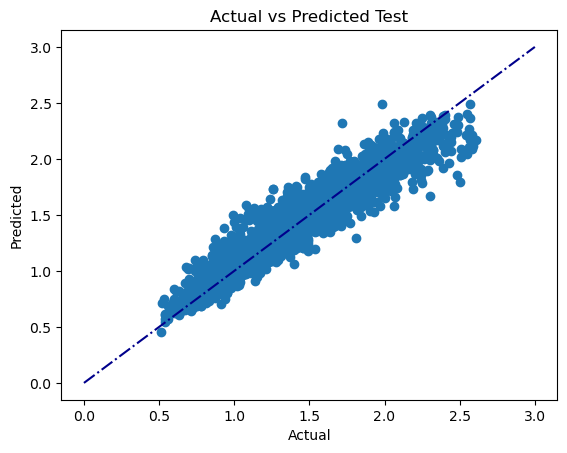

In [60]:
plt.scatter(y_test, final_model_test_pred)

plt.plot([0,3],[0,3],color='darkblue',linestyle='-.',label = "Diagnol")
plt.ylabel("Predicted")
plt.xlabel('Actual')
plt.title('Actual vs Predicted Test')

### Saving Model

In [61]:
import pickle
with open('final_gb_classifier_model.pkl', 'wb') as file:

    pickle.dump(final_model, file)

##### from graph and r2 score we can confidently say that our model predicted 89.67% of data accurately

## Classification

In [62]:
x = df.drop(columns='region')
y=df['region']

### Standerdization

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)

### Train test Split

In [64]:
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [65]:
# creating df for storing acuracy  score
tts_df = pd.DataFrame(data=None,columns=['Random state','Train accuracy','Test accuracy'])

In [66]:
# finding best random state
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    log_reg.fit(x_train,y_train)
    pred_train = log_reg.predict(x_train)
    pred_test = log_reg.predict(x_test)
    train_acc = accuracy_score(y_train,pred_train)
    test_acc = accuracy_score(y_test,pred_test)
    if round(train_acc*100,0) == round(test_acc*100,0):
        tts_df =tts_df.append({'Random state':i,'Train accuracy':train_acc*100,'Test accuracy':test_acc*100},ignore_index=True)

    
tts_df.sort_values('Train accuracy',ascending=False)  

    
    

,Random state,Train accuracy,Test accuracy
14,91.0,51.288952,50.608893
17,105.0,51.097734,50.523931
6,47.0,51.069405,50.637213
10,74.0,51.005666,50.523931
1,22.0,50.970255,50.552251
15,95.0,50.956091,50.637213
9,73.0,50.934844,50.608893
25,196.0,50.920680,50.637213
18,123.0,50.878187,50.977060
20,157.0,50.871105,50.523931


- we can observe that Random state 91 we get max accuracy wit minimum difference

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=91)

### Training the model

Logistic regression 

In [68]:
# Training
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_test_pred=lr.predict(x_test)
print (accuracy_score(y_test,lr_test_pred))

0.5046453659641967


In [69]:
# Find best cv
from sklearn.model_selection import cross_val_score
lr_ac_score = accuracy_score(y_test,lr_test_pred)*100
for i in range(2,10):
    lr_cv_score=cross_val_score(lr,x_scaled,y,cv=i)
    lr_cv_score_mean = lr_cv_score.mean()
    print('\ncv = ',i,'\nCross Validation score = ',lr_cv_score_mean*100,'\nAccuracy score',lr_ac_score,end = '\n\n')
    


cv =  2 
Cross Validation score =  6.350969868191392 
Accuracy score 50.46453659641968


cv =  3 
Cross Validation score =  27.64692433798292 
Accuracy score 50.46453659641968


cv =  4 
Cross Validation score =  30.898897266154414 
Accuracy score 50.46453659641968


cv =  5 
Cross Validation score =  36.825276406542464 
Accuracy score 50.46453659641968


cv =  6 
Cross Validation score =  36.031762744196556 
Accuracy score 50.46453659641968


cv =  7 
Cross Validation score =  39.85055723381621 
Accuracy score 50.46453659641968


cv =  8 
Cross Validation score =  40.24146774398282 
Accuracy score 50.46453659641968


cv =  9 
Cross Validation score =  41.71420569493387 
Accuracy score 50.46453659641968



- cv = 9 is giving best result

In [70]:
cv =9

In [71]:
# creating df for storing cv score and acc score
ms_df = pd.DataFrame(data=None,columns=['Model','CV score','Test accuracy','Difference'])

In [72]:
lr_s_cv_score=cross_val_score(lr,x_scaled,y,cv=cv)
lr_s_cv_score_mean = lr_s_cv_score.mean()
print('\nCross Validation score = ',lr_s_cv_score_mean*100,'\nAccuracy score = ',lr_ac_score,'\nDifference = ',lr_ac_score-(lr_s_cv_score_mean*100))
ms_df = ms_df.append({'Model':'Logistic regression','CV score':round(lr_s_cv_score_mean*100,2),'Test accuracy':round(lr_ac_score,2),'Difference':round(np.abs(lr_ac_score-(lr_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  41.71420569493387 
Accuracy score =  50.46453659641968 
Difference =  8.75033090148581


##### Random  forest classifer

In [73]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_test_pred=rfc.predict(x_test)
rfc_ac_score = accuracy_score(y_test,rfc_test_pred)*100
print (rfc_ac_score)

92.13686834353048


In [74]:
# cross validation
rfc_s_cv_score=cross_val_score(rfc,x_scaled,y,cv=cv)
rfc_s_cv_score_mean = rfc_s_cv_score.mean()
print('\nCross Validation score = ',rfc_s_cv_score_mean*100,'\nAccuracy score = ',rfc_ac_score,'\nDifference = ',(rfc_s_cv_score_mean*100)-rfc_ac_score)
ms_df = ms_df.append({'Model':'Random forest classifier','CV score':round(rfc_s_cv_score_mean*100,2),'Test accuracy':round(rfc_ac_score,2),'Difference':round(np.abs(rfc_ac_score-(rfc_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  76.73716934290474 
Accuracy score =  92.13686834353048 
Difference =  -15.399699000625745


##### AdaBoostClassifier

In [75]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
abc_test_pred=abc.predict(x_test)
abc_ac_score = accuracy_score(y_test,abc_test_pred)*100
print (abc_ac_score)

6.0503059143439835


In [76]:
# cross validation
abc_s_cv_score=cross_val_score(abc,x_scaled,y,cv=cv)
abc_s_cv_score_mean = abc_s_cv_score.mean()
print('\nCross Validation score = ',abc_s_cv_score_mean*100,'\nAccuracy score = ',abc_ac_score,'\nDifference = ',(abc_s_cv_score_mean*100)-abc_ac_score)
ms_df = ms_df.append({'Model':'Adaboost classifier','CV score':round(abc_s_cv_score_mean*100,2),'Test accuracy':round(abc_ac_score,2),'Difference':round(np.abs(abc_ac_score-(abc_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  5.115989568704357 
Accuracy score =  6.0503059143439835 
Difference =  -0.9343163456396262


##### XGBClassifier

In [77]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
xgb_test_pred=xgb.predict(x_test)
xgb_ac_score = accuracy_score(y_test,xgb_test_pred)*100
print (xgb_ac_score)

89.66689326988443


In [78]:
# cross validation
xgb_s_cv_score=cross_val_score(xgb,x_scaled,y,cv=cv)
xgb_s_cv_score_mean = xgb_s_cv_score.mean()
print('\nCross Validation score = ',xgb_s_cv_score_mean*100,'\nAccuracy score = ',xgb_ac_score,'\nDifference = ',(xgb_s_cv_score_mean*100)-xgb_ac_score)
ms_df = ms_df.append({'Model':'XGBOOST classifier','CV score':round(xgb_s_cv_score_mean*100,2),'Test accuracy':round(xgb_ac_score,2),'Difference':round(np.abs(xgb_ac_score-(xgb_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  72.31257280013844 
Accuracy score =  89.66689326988443 
Difference =  -17.354320469745986


##### KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_test_pred=knn.predict(x_test)
knn_ac_score = accuracy_score(y_test,knn_test_pred)*100
print (knn_ac_score)

81.39587582143668


In [82]:
# cross validation
knn_s_cv_score=cross_val_score(knn,x_scaled,y,cv=cv)
knn_s_cv_score_mean = knn_s_cv_score.mean()
print('\nCross Validation score = ',knn_s_cv_score_mean*100,'\nAccuracy score = ',knn_ac_score,'\nDifference = ',(knn_s_cv_score_mean*100)-knn_ac_score)
ms_df = ms_df.append({'Model':'KNN Classifier','CV score':round(knn_s_cv_score_mean*100,2),'Test accuracy':round(knn_ac_score,2),'Difference':round(np.abs(knn_ac_score-(knn_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  48.449415892148565 
Accuracy score =  81.39587582143668 
Difference =  -32.94645992928811


In [83]:
ms_df.sort_values('Test accuracy',ascending=False)

,Model,CV score,Test accuracy,Difference
1,Random forest classifier,76.74,92.14,15.40
3,XGBOOST classifier,72.31,89.67,17.35
4,KNN Classifier,48.45,81.40,32.95
0,Logistic regression,41.71,50.46,8.75
2,Adaboost classifier,5.12,6.05,0.93


- we can observe that Random Forest classifier is giving good accuracy and with lesser difference between cross val score and Test accuracy score

### Hyperparameter Tuning

In [84]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [75,100,125], 
    'min_samples_split': [2,3, 5,], 
    'criterion' : ["gini", "entropy"]
    
}

In [85]:
# using grid search cv
gcv = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,cv=5)
gcv.fit(x_train,y_train)

# Printing the best parameters
print("Best parameters:", gcv.best_params_)

Best parameters: {'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 125}


# Training with best parms

In [86]:
final_model = RandomForestClassifier(criterion= 'entropy', min_samples_split= 2, n_estimators= 125)
final_model.fit(x_train,y_train)
final_model_test_pred=final_model.predict(x_test)
final_model_ac_score = accuracy_score(y_test,final_model_test_pred)*100
print (final_model_ac_score)

92.38613188307274


In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test,final_model_test_pred))


              precision    recall  f1-score   support

           0       0.91      0.97      0.94        91
           1       0.87      0.92      0.89        86
           2       0.91      0.99      0.95        81
           3       0.94      0.86      0.90        98
           4       0.94      0.94      0.94        88
           5       0.89      0.83      0.86        87
           6       1.00      1.00      1.00        80
           7       0.88      0.92      0.90        79
           8       0.96      0.96      0.96        72
           9       0.91      0.96      0.94        83
          10       0.88      0.91      0.89        75
          11       0.94      0.97      0.95        86
          12       0.97      1.00      0.98        97
          13       0.94      0.83      0.88        93
          14       0.91      0.93      0.92        75
          15       0.99      0.99      0.99        74
          16       0.96      0.95      0.95        78
          17       0.96    

### Saving Model

In [88]:
import pickle
with open('final_rfc_classifier_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

### conclusion

Our Final model gives best Accuracy score Hence it is the best model for our data